In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
rc('animation', html='html5')

In [4]:
# Spatial Variables
L = 10000 # Domain length
NX = 1000 # number of grid points
DX = L/(NX-1) # step size in grid points
X = np.linspace(0,L,num=NX) # grid points

# Time variables
T = 100 #
NT = 1000
DT = T/NT
CA = 50

print('CFL: C= ' + str(CA*DT/DX))

# First initial condition
F_ini1 = np.zeros(NX)
F_ini1[:int(NX/6)] = 1
# Second initial condition
F_ini2 = np.cos(np.pi*2*8*X/L)

CFL: C= 0.4995


In [12]:
# Write the array as initial
F = np.copy(F_ini2)

# Loop some time steps
for l in range(1000):
    # Variable after time step
    F_new = np.zeros(NX)
    for i in range(NX):
        x_dep = X[i]-CA*DT # departure position
        j = int(np.floor(x_dep/DX)) # idx to the right of departure point
        k = j + 1 # idx left to the departure point
        alpha = CA*DT/DX - np.floor(CA*DT/DX) # alpha value
        F_new[i] = (1-alpha)*F[j] + alpha*F[k]
    F = np.copy(F_new)

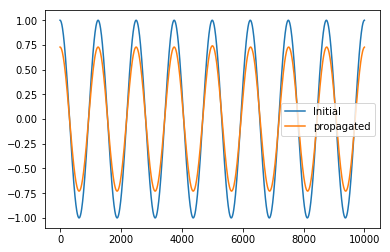

In [13]:
plt.plot(X,F_ini2,label='Initial')
plt.plot(X,F_new,label='propagated')
plt.legend()
plt.show()